# IMPORTING LIBRAIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
ds=pd.read_csv('aggregate_covid_country.csv',parse_dates=['Date'])
ds

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [6]:
ds['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [7]:
ds['Country']

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
                ...        
23683    West Bank and Gaza
23684        Western Sahara
23685                 Yemen
23686                Zambia
23687              Zimbabwe
Name: Country, Length: 23688, dtype: object

In [8]:
ds.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [9]:
ds_dates=pd.DataFrame()
ds_dates['month']=ds['Date'].dt.month_name()
ds_dates['year']=ds['Date'].dt.year
ds_dates['day']=ds['Date'].dt.day_name()
ds_dates['date']=ds['Date'].dt.day
ds_dates

,month,year,day,date
0,January,2020,Wednesday,22
1,January,2020,Wednesday,22
2,January,2020,Wednesday,22
3,January,2020,Wednesday,22
4,January,2020,Wednesday,22
...,...,...,...,...
23683,May,2020,Tuesday,26
23684,May,2020,Tuesday,26
23685,May,2020,Tuesday,26
23686,May,2020,Tuesday,26


In [10]:
#checking distinct years
ds_dates['year'].unique()

array([2020], dtype=int64)

In [11]:
ds_dates['date'].unique()

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
      dtype=int64)

In [12]:
ds_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   23688 non-null  object
 1   year    23688 non-null  int64 
 2   day     23688 non-null  object
 3   date    23688 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 740.4+ KB


In [13]:
ds.drop(columns='Date',axis=1,inplace=True)

In [14]:
ds_new=pd.concat([ds_dates,ds],axis=1,ignore_index=False)

In [15]:
ds_new

,month,year,day,date,Country,Confirmed,Recovered,Deaths
0,January,2020,Wednesday,22,Afghanistan,0,0,0
1,January,2020,Wednesday,22,Albania,0,0,0
2,January,2020,Wednesday,22,Algeria,0,0,0
3,January,2020,Wednesday,22,Andorra,0,0,0
4,January,2020,Wednesday,22,Angola,0,0,0
...,...,...,...,...,...,...,...,...
23683,May,2020,Tuesday,26,West Bank and Gaza,429,365,3
23684,May,2020,Tuesday,26,Western Sahara,9,6,1
23685,May,2020,Tuesday,26,Yemen,249,10,49
23686,May,2020,Tuesday,26,Zambia,920,336,7


# EDA PROCESS

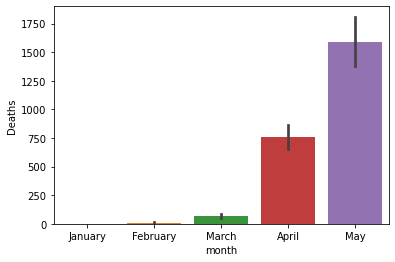

In [16]:
sns.barplot(x='month',y='Deaths',data=ds_new)

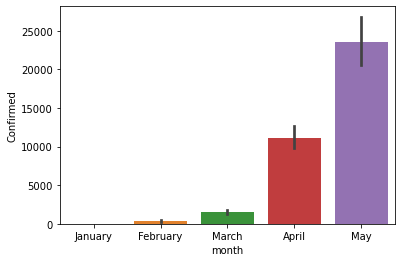

In [17]:
sns.barplot(x='month',y='Confirmed',data=ds_new)

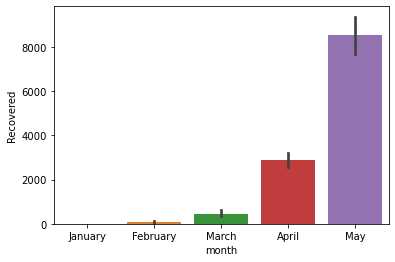

In [18]:
sns.barplot(x='month',y='Recovered',data=ds_new)

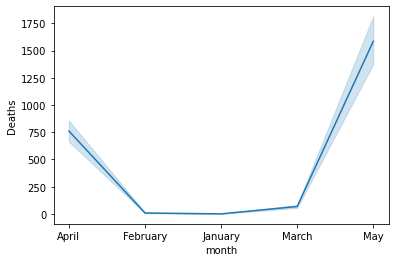

In [19]:
sns.lineplot(x='month',y='Deaths',data=ds_new)

In [20]:
from sklearn.preprocessing import LabelEncoder
list=['month','Country']
le=LabelEncoder()
for i in list:
    ds_new[i]=le.fit_transform(ds_new[i])

In [21]:
ds_new

,month,year,day,date,Country,Confirmed,Recovered,Deaths
0,2,2020,Wednesday,22,0,0,0,0
1,2,2020,Wednesday,22,1,0,0,0
2,2,2020,Wednesday,22,2,0,0,0
3,2,2020,Wednesday,22,3,0,0,0
4,2,2020,Wednesday,22,4,0,0,0
...,...,...,...,...,...,...,...,...
23683,4,2020,Tuesday,26,183,429,365,3
23684,4,2020,Tuesday,26,184,9,6,1
23685,4,2020,Tuesday,26,185,249,10,49
23686,4,2020,Tuesday,26,186,920,336,7


In [22]:
#since year is 2020  and day doesn't have a relevance we can drop them
ds_new.drop(columns=['year','day'],axis=1,inplace=True)

In [23]:
ds_new

,month,date,Country,Confirmed,Recovered,Deaths
0,2,22,0,0,0,0
1,2,22,1,0,0,0
2,2,22,2,0,0,0
3,2,22,3,0,0,0
4,2,22,4,0,0,0
...,...,...,...,...,...,...
23683,4,26,183,429,365,3
23684,4,26,184,9,6,1
23685,4,26,185,249,10,49
23686,4,26,186,920,336,7


In [24]:
ds_new.describe()

,month,date,Country,Confirmed,Recovered,Deaths
count,23688.000000,23688.000000,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,1.952381,15.968254,93.500000,7.969368e+03,2581.801714,526.935030
std,1.500598,8.730660,54.271303,5.842109e+04,15143.101257,3992.815956
min,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,8.000000,46.750000,0.000000e+00,0.000000,0.000000
50%,2.000000,16.000000,93.500000,1.800000e+01,1.000000,0.000000
75%,3.000000,24.000000,140.250000,7.300000e+02,123.000000,13.000000
max,4.000000,31.000000,187.000000,1.680913e+06,384902.000000,98913.000000


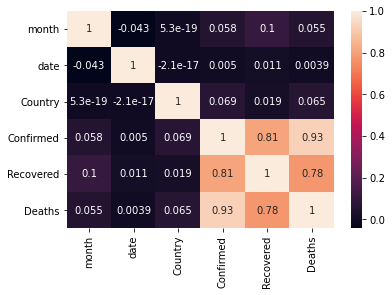

In [25]:
sns.heatmap(ds_new.corr(),annot=True)

In [26]:
y=ds['Deaths']
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23688, dtype: int64

In [27]:
ds_new.drop(columns=['month','date','Country'],axis=1,inplace=True)

In [28]:
ds_new

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


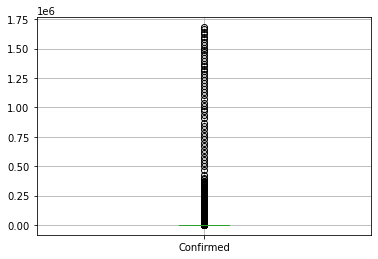

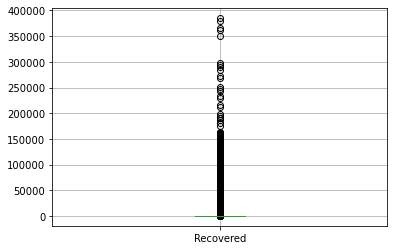

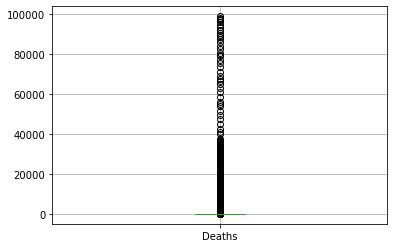

In [29]:
for i in ds_new.columns:
    plt.figure()
    ds_new.boxplot([i])

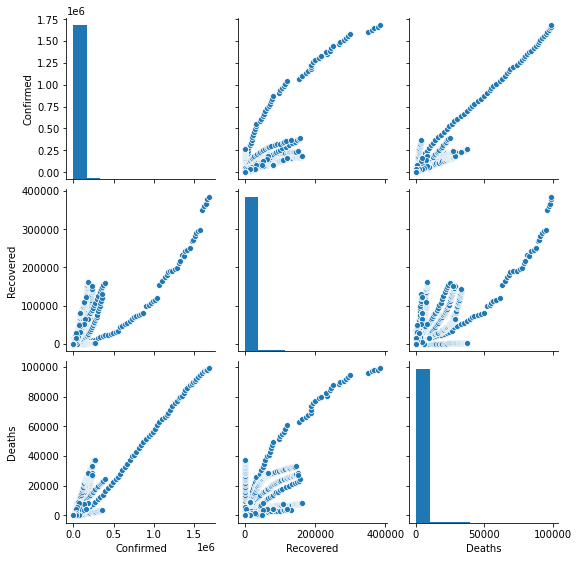

In [30]:
sns.pairplot(ds_new)

# TRAINING AND TESTING PROCESS

In [31]:
ds_x=ds_new.drop(columns='Deaths',axis=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [32]:
x

,Confirmed,Recovered
0,-0.136415,-0.170497
1,-0.136415,-0.170497
2,-0.136415,-0.170497
3,-0.136415,-0.170497
4,-0.136415,-0.170497
...,...,...
23683,-0.129072,-0.146393
23684,-0.136261,-0.170101
23685,-0.132153,-0.169837
23686,-0.120667,-0.148308


In [33]:
x.shape

(23688, 2)

In [34]:
y.shape

(23688,)

training the model


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [37]:
x_train.shape

(15870, 2)

In [38]:
y_train.shape

(15870,)

In [39]:
x_test.shape

(7818, 2)

In [40]:
y_test.shape

(7818,)

In [41]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding",final_r_state,'is',max_r_score)

max r2 score corresponding 96 is 0.9080554713222967


In [42]:
#max r2 score we get at random state 96
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=96,test_size=.33)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print('r2 score is:',r2_score(y_test,pred))
print('MSE is:',mean_squared_error(y_test,pred))
print('MAE is:',mean_absolute_error(y_test,pred))

r2 score is: 0.9080554713222967
MSE is: 1802409.7190545634
MAE is: 249.5590870591669


In [43]:
print('coefficient of linear model:',lr.coef_)

print('intercept of linear model:',lr.intercept_)

coefficient of linear model: [3508.99999009  334.96186487]
intercept of linear model: 533.4789092287276


In [44]:
#saving the model
import joblib
#saving model as a pickel file
joblib.dump(lr,'covid19.pkl')

['covid19.pkl']